## Homework 2: Python basic stats

Let's try a single example that (tries to) bring in the things we've seen. Here's some practice with the basic operations. 

Let's say you're the teacher of your school's introductory Quantum Mechanics class. You've just graded their first midterm, and are shocked, (*shocked*) to see so many low scores (You thought the midterm was totally reasonable!) 

Before you post their individual scores, which might give some students a heart attack, you decide to calculate the distribution statistics of the exam first, so that each student can compare their score to the average, etc. 

The scores are (out of 120): 100, 68, 40, 78, 81, 65, 39, 118, 46, 78, 9, 37, 43, 87, 54, 29, 95, 87, 111, 65, 43, 53, 47, 16, 98, 82, 58, 5, 49, 67, 60, 76, 16, 111, 65, 61, 73, 63, 115, 72, 76, 48, 75, 101, 45, 46, 82, 57, 17, 88, 90, 53, 32, 28, 50, 91, 93, 7, 63, 88, 55, 37, 67, 0, 79.

Your first step to analyzing these numbers should be to put them in a list (call it "scores"). Do that in a cell below (you can copy and paste from above, just add the list syntax). 

In [2]:
scores = [100, 68, 40, 78, 81, 65, 39, 118, 46, 78, 9, 37, 43, 87, 54, 29, 95, 87, 111, 65, 43, 53, 47, 16, 98, 82, 58, 5, 49, 67, 60, 76, 16, 111, 65, 61, 73, 63, 115, 72, 76, 48, 75, 101, 45, 46, 82, 57, 17, 88, 90, 53, 32, 28, 50, 91, 93, 7, 63, 88, 55, 37, 67, 0, 79]
#your code here

Now, the first thing we need to do is calculate the average score. Later on, we'll see that there are external functions you can import into Python that will just do this for you, but for now let's calculate it manually (it's easy enough, right?). 

As it turns out, you can run the ``sum()`` function on a list (so long as it only contains numbers) and it will tell you the sum. The only other thing you'll need to calculate the average is the ``len()`` function, which returns the number of elements in a list/array. Using those two, define a variable below called "average_score" and calculate it.

In [3]:
#your code here

average_score = sum(scores)/len(scores)
print(average_score)

61.96923076923077


Great, so we now know what the average score on the test was. Let's figure out what that is in percent. In the cell below, calculate the percentage value of the average score by dividing it by the number of points on the test, and mulitplying that by 100 in the same line. Then, run the cell - you'll see a nice sentence output that lists the percentage, take a look at the line I wrote that does this and see if you can glean how it worked.

In [5]:
#your code here
total = 120
avg_score_percent = (average_score/total)*100

shortened = str(avg_score_percent) #turn it into a string
statement = "The average score on the test was a {}%".format(shortened[0:5]) #use indexing on the string to drop the everything past the second decimal
print(statement)

The average score on the test was a 51.64%


Okay, so the other thing students are always interested in is the standard deviation from the mean - this basically will tell them whether they get an A, B, C, D, or F on the test assuming you curve. The formula for a standard deviation is 
$$ 
s = \sqrt{\frac{\sum_{1}^{N}(x_i - \mu)^2}{N-1}}
$$

where $\mu$ is the average and N is the total number of scores.

We already know how to get N, and we know what $\mu$ is as well. So to calculate this, we need to know how to calculate the quantity on the top of the fraction. This is actually kind of tricky with the methods we have on hand, so I'm going to introduce a new concept: Numpy (numerical python) arrays. I'm going to get into these in detail in part 2 of the bootcamp, but for now, see the example below for elucidation on why we're about to use them:

In [11]:
import numpy as np
arr_version = np.array(scores)
#print(scores-1)


Okay, so I can't subtract an integer from a list. What if I try the array version?

In [7]:
print(arr_version-1)

[ 99  67  39  77  80  64  38 117  45  77   8  36  42  86  53  28  94  86
 110  64  42  52  46  15  97  81  57   4  48  66  59  75  15 110  64  60
  72  62 114  71  75  47  74 100  44  45  81  56  16  87  89  52  31  27
  49  90  92   6  62  87  54  36  66  -1  78]


If you look, you should see that each of those scores is the original score with one subtracted off it. Your spidey senses should be tingling then for how we can leverage this functionality to calculate our STD. In the cell below, fill in the variable I'm calling "top_frac" to calculate this quantity:
$$
\sum_{i=1}^N (x_i - \mu)^2
$$

Notice here that you don't have to actually calculate it one by one - if we first compute a single array that represents each score with the mean subtracted off and then that value squared, then we finish off top_frac just by summing up that array as we've done before. Feel free to use my variable "arr_version".

In [8]:
#your code here
submean = arr_version-average_score
top_frac = sum(submean**2)

print(top_frac)

51313.93846153845


With that done, we can easily apply the formula to get the final STD - **Hint:** the function np.sqrt() will be useful here.

In [9]:
#your code here
STD_scores = np.sqrt(top_frac/(len(scores)-1))

print(STD_scores)

28.31572510923106


Alright! If you've done everything correctly, you should have found that the average score is a 61/120, with a stadard deviation of 28. Let's, for fun, make a helpful plot to show the students their scores. Don't worry about how the plotting stuff works just yet, we'll dive into it more in part 2, but see if you can figure out what each part of the command is doing.

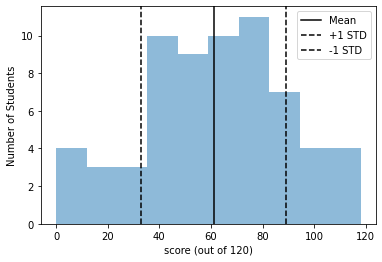

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(scores,alpha=0.5)
plt.axvline(61,color='k',label="Mean")
plt.axvline(89,ls='--',color='k',label="+1 STD")
plt.axvline(33,ls='--',color='k',label="-1 STD")
plt.xlabel('score (out of 120)')
plt.ylabel('Number of Students')
plt.legend()

Nice! It looks like our formula for standard deviation successfully describes the original distribution of scores pretty well. Now, how to get them to do better on midterm 2....

## Wrap up & Turn In

I hope this super-basic introduction has given you a glimpse at some of the basic functionality of Python. Of course, Python is way more powerful than what has been shown here. I call this Part 1 because once you know the basic data types, how to define variables, and do some simple math on them, we are going to need to jump into new concepts — for loops and conditional statements, as well as invoke new libraries (like numpy and matplotlib) to do make further progress. 

To turn in, upload to your GitHub account using Git Desktop by Friday, September 3rd, 5pm